__Abstract__
 - Goal 
     - Apply backward time, centered space (FTCS) to heat equation, and fix stability.
 - Ref
     - [FDM heat](http://www.nada.kth.se/~jjalap/numme/FDheat.pdf), [Hir13]

__Problem__

- Heat equation:
$$u_t = \alpha u_{xx}, \quad a\le x \le b, t\ge 0$$
- Boundary condition:
$$u(a, t) = g(t); \quad u(b, t) = h(t).$$
- Initial condition:
$$u(x, 0) = f(x).$$

__Anal__

Grid with $\Delta x$ and $\Delta t$ will be
$$x_i = a + i \Delta x; \ \Delta x = \frac{b-a}{N}, \ i = 0, 1, \ldots, N$$
and
$$t_k = k \Delta t; \ \Delta t = T/M, \ k = 0, 1, \ldots, M.$$

Use backward difference in time, central difference in space, one obtains iterative scheme inside the domain:
$$
-\rho u_{i-1, k} + (1 + 2\rho) u_{i,k} - \rho u_{i+1,k} = u_{i,k-1}
\quad 
1\le i \le N-1, 1\le k \le M
$$
where
$$\rho = \frac{\alpha \Delta t}{(\Delta x)^2}.$$
It can be shown unconditionally stable.

__Para__

- $\alpha = 1$, $a = 0$, $b = 1$;
- $f(x) = \sin(\pi x)$
- $g(t) = h(t) = 0$.
- Exact solution:
$$u(x, t) = e^{- \pi^2 t} \sin(\pi x).$$

__Algo__

- Input PDE paras
- Set up dx, dt, and initial/boundary data
- Do matrix operation in interior

__Implementation - 01__

We use ftcs with $\rho = 1$.

In [1]:
%reset -f
from ftcs_stability_heat import *

In [2]:
dx = .2 #space mesh size
rho = 1. #conditinal number, to be less than .5 for the stability
dt = rho*(dx**2)/al #time step size

u, x_mesh, t_mesh = ftcs_heat_1d(dx, rho)

In [3]:
TT, XX = np.meshgrid(t_mesh, x_mesh)    
error = u - u_exact(XX,TT)

print('rho is:' + str(rho))
print('max error:' + str(np.max(np.abs(error))))


rho is:1.0
max error:7510.761588062933


In [4]:
import matplotlib.pyplot as plt
M = t_mesh.size -1
fig1 = plt.figure()
for i in np.arange(M-2, M+1):
    plt.plot(x_mesh, error[:,i], label = 't = '+ str(round(i*dt,2)))
plt.legend()    
plt.show()

__Implementation - 02__

We use btcs with $\rho = 1$. 

In [5]:
%reset -f
from btcs_stability_heat import *

dx = .1 #space mesh size
rho = 2. #conditinal number, to be less than .5 for the stability
dt = rho*(dx**2)/al #time step size

u, x_mesh, t_mesh = btcs_heat_1d(dx, rho)

In [6]:
TT, XX = np.meshgrid(t_mesh, x_mesh)    
error = u - u_exact(XX,TT)

print('rho is:' + str(rho))
print('max error:' + str(np.max(np.abs(error))))

rho is:2.0
max error:0.8208687174155399


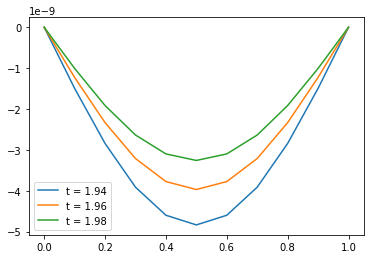

In [7]:
import matplotlib.pyplot as plt
M = t_mesh.size -1
fig1 = plt.figure()
for i in np.arange(M-2, M+1):
    plt.plot(x_mesh, error[:,i], label = 't = '+ str(round(i*dt,2)))
plt.legend()  

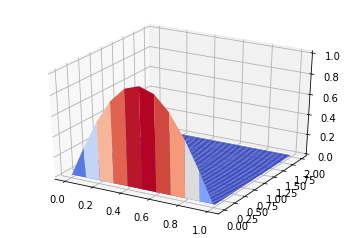

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

'''
plot surface
'''
fig = plt.figure()
ax = fig.gca(projection='3d')
surf_num = ax.plot_surface(XX,TT, u, cmap=cm.coolwarm)
plt.show()